# **Solar System Simulation**

## **University Project**

- Louai Abdallah BENAISSA

### **Introduction:**  
This project aims to simulate the solar system using **modular programming** and **numerical methods**. To achieve this, we solve differential equations that describe the movements of celestial bodies under gravitational interaction.

---


In [1]:
from support import *


# Step 1: Simplified Earth-Moon System

In this first step, we will solve and simulate the Earth-Moon system using several numerical methods: Euler’s method, the second-order Runge-Kutta method (RK2), the fourth-order Runge-Kutta method (RK4), and finally, the finite differences method. These approaches approximate the Moon's trajectory while comparing their respective advantages.

---

## Mathematical Model

The Earth-Moon system is governed by the following motion equation, where the gravitational force acts as an acceleration on the Moon:

$$
M_L \frac{d^2 \mathbf{r}_L(t)}{dt^2} = \mathbf{F}_g = \frac{G M_T M_L}{r^2(t)} \left( - \frac{\mathbf{r}_L(t)}{r(t)} \right)
$$

### Definitions:
- $\mathbf{r}_L(t)$: Position of the Moon relative to the Earth in 2D ($\mathbf{r}_L(t) = (x_L(t), y_L(t))$).
- $r(t)$: Distance between the Earth and the Moon at time $t$, i.e., $r(t) = \|\mathbf{r}_L(t)\|$.
- $\mathbf{v}(t)$: Velocity of the Moon ($\mathbf{v}(t) = \frac{d\mathbf{r}_L(t)}{dt}$).
- $\mathbf{a}(t)$: Acceleration of the Moon due to gravity ($\mathbf{a}(t) = \frac{d\mathbf{v}(t)}{dt}$).

### Initial Conditions:
- Initial position (vector):  
  $$ \mathbf{r}_0 = \begin{pmatrix} 384400 \\ 0 \end{pmatrix} \, \text{km} $$
- Initial velocity (vector):  
  $$ \mathbf{v}_0 = \begin{pmatrix} 0 \\ 1.022 \end{pmatrix} \, \text{km/s} $$

---

## Numerical Methods

### 1. Euler’s Method

Euler’s method is simple and intuitive, using a linear approximation of derivatives at each time step. The equations are:

1. **Velocity update**:  
   $$ \mathbf{v}_{i+1} = \mathbf{v}_i + h \mathbf{a}_i $$  

2. **Position update**:  
   $$ \mathbf{r}_{i+1} = \mathbf{r}_i + h \mathbf{v}_i $$  

Here, $h$ is the time step. Although efficient for quick estimates, this method may show limitations for large $h$ values.

---

### 2. Second-Order Runge-Kutta Method (RK2)

The second-order Runge-Kutta method improves accuracy by introducing intermediate coefficients to better estimate the system dynamics.

#### $k_1$, $k_2$:

1. **Calculation of intermediate coefficients**:  
   $$ k_1 = h \mathbf{a}(\mathbf{r}_i) $$  
   $$ l_1 = h \mathbf{v}_i $$  
   $$ k_2 = h \mathbf{a}(\mathbf{r}_i + l_1) $$  
   $$ l_2 = h (\mathbf{v}_i + k_1) $$  

2. **Variable update**:  
   $$ \mathbf{v}_{i+1} = \mathbf{v}_i + \frac{1}{2}(k_1 + k_2) $$  
   $$ \mathbf{r}_{i+1} = \mathbf{r}_i + \frac{1}{2}(l_1 + l_2) $$  

This approach, often called the midpoint method, offers better precision without excessive complexity.

---

### 3. Fourth-Order Runge-Kutta Method (RK4)

The fourth-order Runge-Kutta method is renowned for its high accuracy due to successive estimations over the same time interval.

1. **Calculation of intermediate coefficients**:  
   $$ k_1 = h \mathbf{a}(\mathbf{r}_i) $$  
   $$ l_1 = h \mathbf{v}_i $$  
   $$ k_2 = h \mathbf{a}\left(\mathbf{r}_i + \frac{l_1}{2}\right) $$  
   $$ l_2 = h \left(\mathbf{v}_i + \frac{k_1}{2}\right) $$  
   $$ k_3 = h \mathbf{a}\left(\mathbf{r}_i + \frac{l_2}{2}\right) $$  
   $$ l_3 = h \left(\mathbf{v}_i + \frac{k_2}{2}\right) $$  
   $$ k_4 = h \mathbf{a}(\mathbf{r}_i + l_3) $$  
   $$ l_4 = h (\mathbf{v}_i + k_3) $$  

2. **Variable update**:  
   $$ \mathbf{v}_{i+1} = \mathbf{v}_i + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4) $$  
   $$ \mathbf{r}_{i+1} = \mathbf{r}_i + \frac{1}{6}(l_1 + 2l_2 + 2l_3 + l_4) $$  

This method, though computation-intensive, is highly accurate and stable, making it suitable for long-term simulations.

---

### 4. Finite Differences Method

The finite differences method is robust and can yield precise results using fine discretization. Unlike Euler’s method, it performs well with an adapted time step. Before implementation, the second sample position must be calculated using Euler’s method:  
$$ \mathbf{r}_{1} = \mathbf{r}_0 + h \mathbf{v}_0 $$

2. **Position update**:  
   $$ \mathbf{r}_{i+1} = 2 \mathbf{r}_i - \mathbf{r}_{i-1} + h^2 \mathbf{a}\left(\mathbf{r}_i\right) $$  

Thanks to its efficiency and simplicity, this method is widely used for problems like this, where errors remain limited if an appropriate time step $h$ is chosen.

---

The next step is to implement these methods, compare their results, and study the impact of the time step choice on the accuracy of the simulated trajectory.


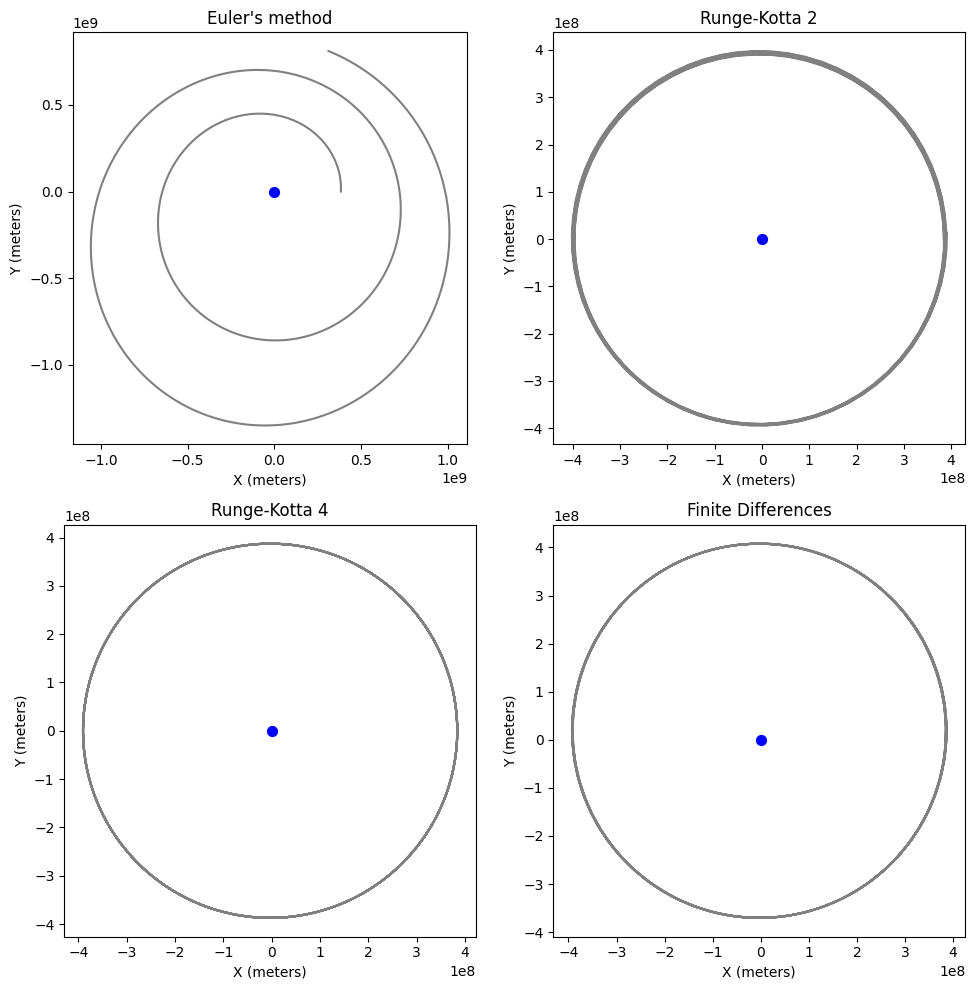

In [2]:
tf = 200*24*3600 # tf : final simulation time.
h = 10*3600      # h : step time.

Moon = Planet(M_L,[R_L,0],[0,V_L]) # Initiation of the Moon Object.
Earth = Planet(M_T,[0,0],[0,0])     # Initiation of the Earth Object.
# Calculating positions 
rL_Euler = Euler(Moon,Earth,tf,h)
rL_RK2   = RK2(Moon,Earth,tf,h)
rL_RK4   = RK4(Moon,Earth,tf,h)
rL_Diff  = DiffSimple(Moon,Earth,tf,h)
# Displaying
ShowMethods(rL_Euler,rL_RK2,rL_RK4,rL_Diff)

## Conclusion

Each method presented has its advantages:  
- Euler’s method is simple but prone to errors.  
- The RK2 method improves accuracy with minimal additional effort.  
- The RK4 method, more sophisticated, ensures remarkable precision.  
- The finite differences method, with a fine time step, combines robustness and simplicity.  
---

The most suitable methods for larger time steps are the RK4 method and finite differences. However, for code simplicity and execution time, we will proceed with the finite differences method.


# Step 2: Earth-Moon System

In this step, we will solve and simulate the Earth-Moon system using the finite differences method. This approach allows us to approximate the trajectory of the Earth and the Moon while considering their reciprocal gravitational interactions.

---

## Mathematical Model

The Earth-Moon system is governed by the following equations of motion, where gravitational forces act on both bodies:  

$$
M_L \frac{d^2 \mathbf{r}_L(t)}{dt^2} = \mathbf{F}_{gL} = \frac{G M_T M_L}{r^2(t)} \left( - \frac{\mathbf{r}_L(t)-\mathbf{r}_T(t)}{r(t)} \right)
$$

$$
M_T \frac{d^2 \mathbf{r}_T(t)}{dt^2} = \mathbf{F}_{gT} = \frac{G M_T M_L}{r^2(t)} \left( \frac{\mathbf{r}_L(t)-\mathbf{r}_T(t)}{r(t)} \right)
$$

### Definitions: 
- $\mathbf{r}_L(t)$: Position of the Moon relative to the Earth in 2D ($\mathbf{r}_L(t) = (x_L(t), y_L(t))$).  
- $\mathbf{r}_T(t)$: Position of the Earth relative to the Moon in 2D ($\mathbf{r}_T(t) = (x_T(t), y_T(t))$).  
- $r(t)$: Distance between the Earth and the Moon at time $t$, i.e. $r(t) = \|\mathbf{r}_L(t) - \mathbf{r}_T(t)\|$.  
- $\mathbf{v}_L(t)$: Velocity of the Moon ($\mathbf{v}_L(t) = \frac{d\mathbf{r}_L(t)}{dt}$).  
- $\mathbf{v}_T(t)$: Velocity of the Earth ($\mathbf{v}_T(t) = \frac{d\mathbf{r}_T(t)}{dt}$).  
- $\mathbf{a}_L(t)$: Acceleration of the Moon due to gravity ($\mathbf{a}_L(t) = \frac{d\mathbf{v}_L(t)}{dt}$).  
- $\mathbf{a}_T(t)$: Acceleration of the Earth due to gravity ($\mathbf{a}_T(t) = \frac{d\mathbf{v}_T(t)}{dt}$).  

### Importance of Initial Conditions

It is crucial to define the initial conditions correctly to ensure the stability and accuracy of the model. Arbitrary initial conditions can lead to rapid divergence of the system. To avoid this, it is essential to ensure the initial position and velocity of the center of mass are zero.

For the center of mass to have zero initial position and velocity:  

- Initial position of the center of mass:  
  $$ \mathbf{r}_{CG}(0) = \frac{M_T \mathbf{r}_{T0} + M_L \mathbf{r}_{L0}}{M_T + M_L} = 0 $$

- Initial velocity of the center of mass:  
  $$ \mathbf{v}_{CG}(0) = \frac{M_T \mathbf{v}_{T0} + M_L \mathbf{v}_{L0}}{M_T + M_L} = 0 $$

- Initial position of the Earth (vector):  
  $$ \mathbf{r}_{T0} = -\frac{M_L}{M_T} \mathbf{r}_{L0} $$

- Initial position of the Moon (vector):  
  $$ \mathbf{r}_{L0} = \begin{pmatrix} 384400 \\ 0 \end{pmatrix} \, \text{km} $$

- Initial velocity of the Earth (vector):  
  $$ \mathbf{v}_{T0} = -\frac{M_L}{M_T} \mathbf{v}_{L0} $$

- Initial velocity of the Moon (vector):  
  $$ \mathbf{v}_{L0} = \begin{pmatrix} 0 \\ 1.022 \end{pmatrix} \, \text{km/s} $$

---

### Algorithm

The finite differences method:  

2. **Updating positions**:  
   $$ \mathbf{r}_{L,i+1} = 2 \mathbf{r}_{L,i} - \mathbf{r}_{L,i-1} + h^2 \mathbf{a_L}\left(\mathbf{r}_{L,i}\right) $$  
   $$ \mathbf{r}_{T,i+1} = 2 \mathbf{r}_{T,i} - \mathbf{r}_{T,i-1} + h^2 \mathbf{a_T}\left(\mathbf{r}_{T,i}\right) $$  


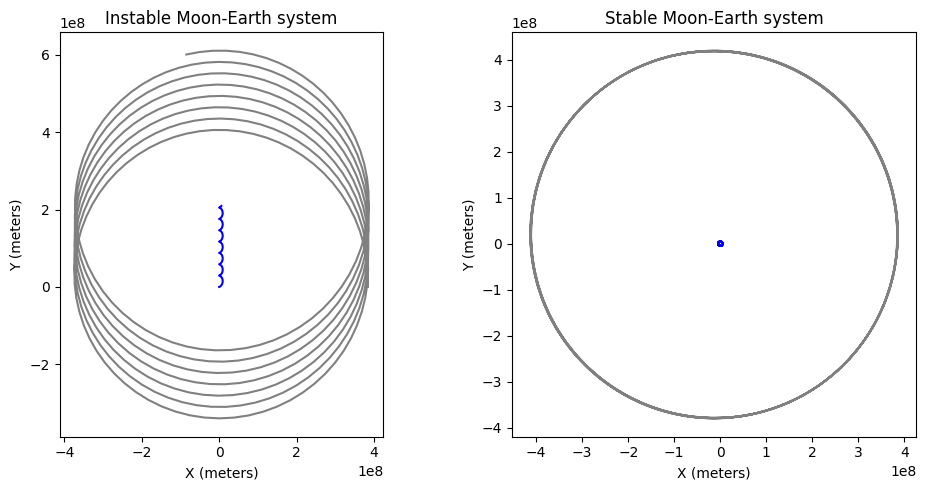

In [3]:
Earth_instable = Planet(M_T,[0,0],[0,0])
Moon_instable = Planet(M_L,[R_L,0],[0,V_L])


Earth_stable = Planet(M_T,[-R_L*M_L/M_T,0],[0,-V_L*M_L/M_T])
Moon_stable = Planet(M_L,[R_L,0],[0,V_L])

rL_instable,rT_instable = DiffReal(Moon_instable,Earth_instable,tf,h)
rL_stable,  rT_stable   = DiffReal(Moon_stable,Earth_stable,tf,h)

ShowSimulation2(rL_instable,rT_instable,rL_stable,rT_stable)



## Conclusion

The finite differences method, combined with well-defined initial conditions, provides an efficient and accurate approach for simulating the Earth-Moon system.


# Step 3: Simplified Solar System

As in Step 1 with the simplified Earth-Moon system, we use the same principles here to model gravitational interactions in a simplified solar system. Each planet is attracted to the Sun in the same way the Moon is attracted to the Earth.


In [4]:
# Zoomed In System
Mercure = Planet(m = 3.3  * 10**23, r0 = [57.9  * 10**9, 0], v0=[0, 47.4 * 10**3])
Venus   = Planet(m = 4.87 * 10**24, r0 = [108.2 * 10**9, 0], v0=[0, 35   * 10**3])
Earth   = Planet(m = 5.97 * 10**24, r0 = [149.6 * 10**9, 0], v0=[0, 29.8 * 10**3])
Mars    = Planet(m = 6.42 * 10**23, r0 = [227.9 * 10**9, 0], v0=[0, 24.1 * 10**3])

Internal = [Mercure,Venus,Earth,Mars]

# Zoomed out System
Jupiter = Planet(m = 1.9  * 10**27, r0 = [778.5 * 10**9, 0], v0=[0, 13.1 * 10**3])
Saturn  = Planet(m = 5.68 * 10**26, r0 = [1433  * 10**9, 0], v0=[0, 9.7  * 10**3]) 
Uranus  = Planet(m = 8.68 * 10**25, r0 = [2872.5* 10**9, 0], v0=[0, 6.8  * 10**3])
Neptune = Planet(m = 1.024* 10**26, r0 = [4495.1* 10**9, 0], v0=[0, 5.4  * 10**3])

External= [Jupiter,Saturn,Uranus,Neptune]

Sun= Planet(m=1.989 * 10**30,r0=None,v0=None) 

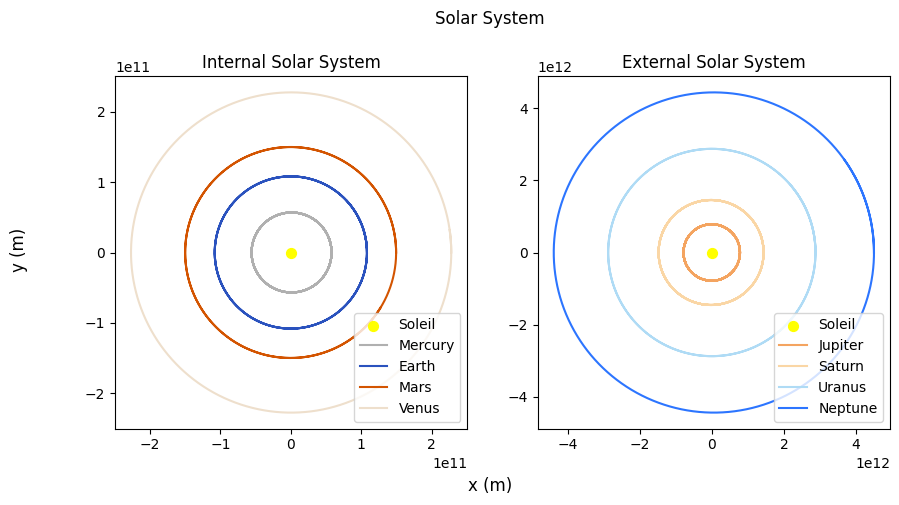

In [5]:
# Simulation and step time for the internal system
tf1 = 700*24*3600
h1  = 3600

# Simulation and step time for the external system
tf2 = 65000*24*3600
h2  = 65000 
# Calculating positions
Rint = DiffSimpleAll(Internal,tf1,h1,Sun)
Rext = DiffSimpleAll(External,tf2,h2,Sun)
# Displaying
ShowSimulation3(Internal,External,Rint,Rext)

# Step 4: Solar System

### 1. Gravitational Forces

Newton's universal law of gravitation states that each body exerts a gravitational force on another body. The gravitational force between two bodies `i` and `j` is given by:  

$$
F_{ij} = G \frac{m_i m_j}{r_{ij}^2}
$$  

- $G$ is the gravitational constant,  
- $m_i$ and $m_j$ are the masses of bodies `i` and `j`,  
- $r_{ij}$ is the distance between the two bodies.  

This force is directed along the line connecting the two bodies.

### 2. Accelerations Acting on a Planet

For a planet `i`, the accelerations acting on it are due to the gravitational influence of all other planets and the Sun. The total acceleration on planet `i` is the sum of the accelerations caused by all planets `j` and the Sun. The total acceleration of planet `i` is expressed as:  

$$
\vec{a}_i = \sum_{j \neq i} \frac{G m_j}{r_{ij}^2} \hat{r}_{ij} + \frac{G M_{\text{Sun}}}{r_{i, \text{Sun}}^2} \hat{r}_{i, \text{Sun}}
$$  

- $\hat{r}_{ij}$ is the unit vector directed from `i` to `j`,  
- $r_{ij}$ is the distance between planets `i` and `j`,  
- $M_{\text{Sun}}$ is the mass of the Sun,  
- $r_{i, \text{Sun}}$ is the distance between planet `i` and the Sun.

### Algorithm

The finite differences method:  

2. **Updating positions**:  
For sample `j` the position of the planet `i` is as follows :  
   $$ \mathbf{r}_{i,j+1} = 2 \mathbf{r}_{i,j} - \mathbf{r}_{i,j-1}  + h^2 \mathbf{a_j}\left(\mathbf{r}_{j,i}\right) $$  

---

These equations allow calculating the positions and velocities of the planets at each step of the simulation.


In [6]:
# Zoomed In System
Mercure = Planet(m = 3.3  * 10**23, r0 = [57.9  * 10**9, 0], v0=[0, 47.4 * 10**3])
Venus   = Planet(m = 4.87 * 10**24, r0 = [108.2 * 10**9, 0], v0=[0, 35   * 10**3])
Earth   = Planet(m = 5.97 * 10**24, r0 = [149.6 * 10**9, 0], v0=[0, 29.8 * 10**3])
Mars    = Planet(m = 6.42 * 10**23, r0 = [227.9 * 10**9, 0], v0=[0, 24.1 * 10**3])
# Zoomed out System
Jupiter = Planet(m = 1.9  * 10**27, r0 = [778.5 * 10**9, 0], v0=[0, 13.1 * 10**3])
Saturn  = Planet(m = 5.68 * 10**26, r0 = [1433  * 10**9, 0], v0=[0, 9.7  * 10**3]) 
Uranus  = Planet(m = 8.68 * 10**25, r0 = [2872.5* 10**9, 0], v0=[0, 6.8  * 10**3])
Neptune = Planet(m = 1.024* 10**26, r0 = [4495.1* 10**9, 0], v0=[0, 5.4  * 10**3])

Sun= Planet(m=1.989 * 10**30,r0=0,v0=0)

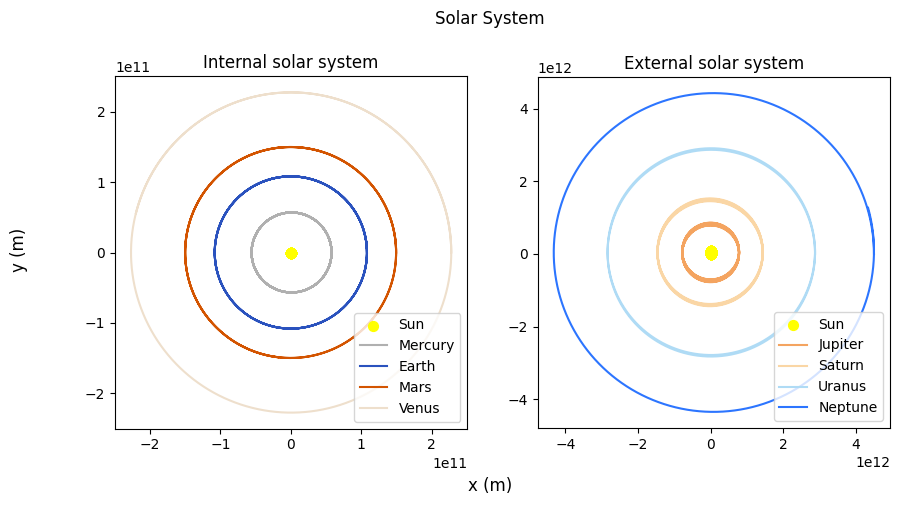

In [7]:
# Simulation and step time for the internal system
tf1 = 1000*3600*24
h1 = 3600
# Simulation and step time for the external system
tf2 = 61000*3600*24
h2 = 50000
# Internal and external systems definitions
Internal = [Sun,Mercure,Venus,Earth,Mars]
External = [Sun,Jupiter,Saturn,Uranus,Neptune]

# Positions
rint = DiffRealAll(Internal,tf1,h1)
rext = DiffRealAll(External,tf2,h2)
# Displaying
ShowSimulation4(Internal,External,rint,rext)

# Runtime around 20 secs.

And if we give an initial speed to the sun, we can see how the planets would follow and orbit.

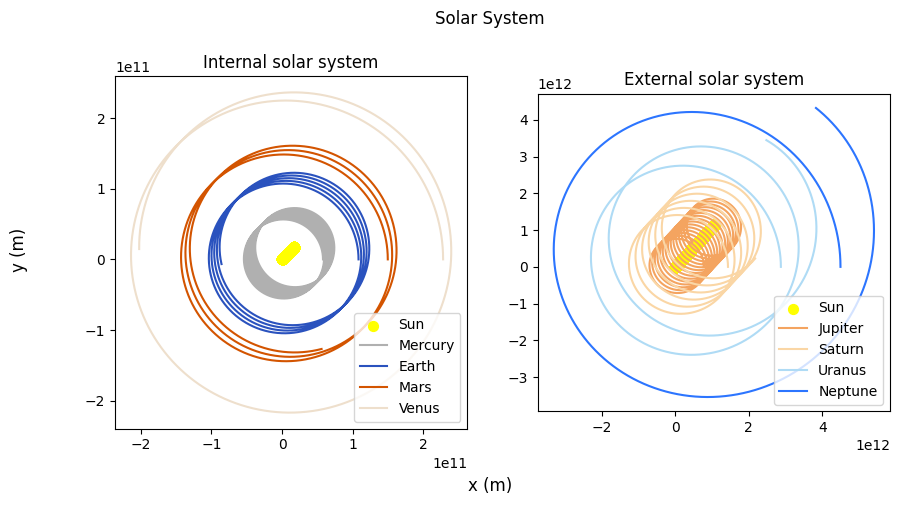

In [8]:
# Mobile Sun
Sun= Planet(m=1.989 * 10**30,r0=0,v0=200)
# Internal and external systems
Internal = [Sun,Mercure,Venus,Earth,Mars]
External = [Sun,Jupiter,Saturn,Uranus,Neptune]
# Positions
rint = DiffRealAll(Internal,tf1,h1)
rext = DiffRealAll(External,tf2,h2)
# Displaying
ShowSimulation4(Internal,External,rint,rext)


# Runtime around 20 secs.

## Conclusion

This project underscored the critical role of timestep selection in numerical simulations. An overly large timestep can lead to divergence or inaccurate results, while an excessively small one may unnecessarily extend computation time without significant gains in accuracy. Additionally, we observed that the precision of results varies significantly depending on the numerical methods employed, emphasizing the importance of choosing the right tools for each problem.

Beyond technical aspects, this project provided an excellent opportunity to enhance our skills in programming and project management. Structuring the code, handling various stages of the project, and collaborating effectively have strengthened our ability to manage complex, multidisciplinary projects successfully.
